#### Import Important Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Load Dataset

In [2]:
df = pd.read_csv("student_scores.csv")

# Let's Analyze Dataset

### `Analyze attributes`

In [3]:
df.head(3)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91


In [4]:
df.tail()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93
30640,960,male,group B,some college,standard,none,married,never,no,1.0,school_bus,5 - 10,64,60,58


## Check how many rows and columns are present in dataset

In [5]:
df.shape

(30641, 15)

## Get info of dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


### Analyze columns one by one

In [7]:
df['Gender'].unique()

array(['female', 'male'], dtype=object)

In [8]:
df['EthnicGroup'].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

## We see that their are some missing values present in EthnicGroup column

In [9]:
df['ParentEduc'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school', nan],
      dtype=object)

In [10]:
df['TransportMeans'].unique()

array(['school_bus', nan, 'private'], dtype=object)

In [11]:
df['WklyStudyHours'].unique()

array(['< 5', '5 - 10', '> 10', nan], dtype=object)

### Describe data

In [12]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [13]:
df.isna().sum() ## Check how many values are null

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# Heatmap of missing values

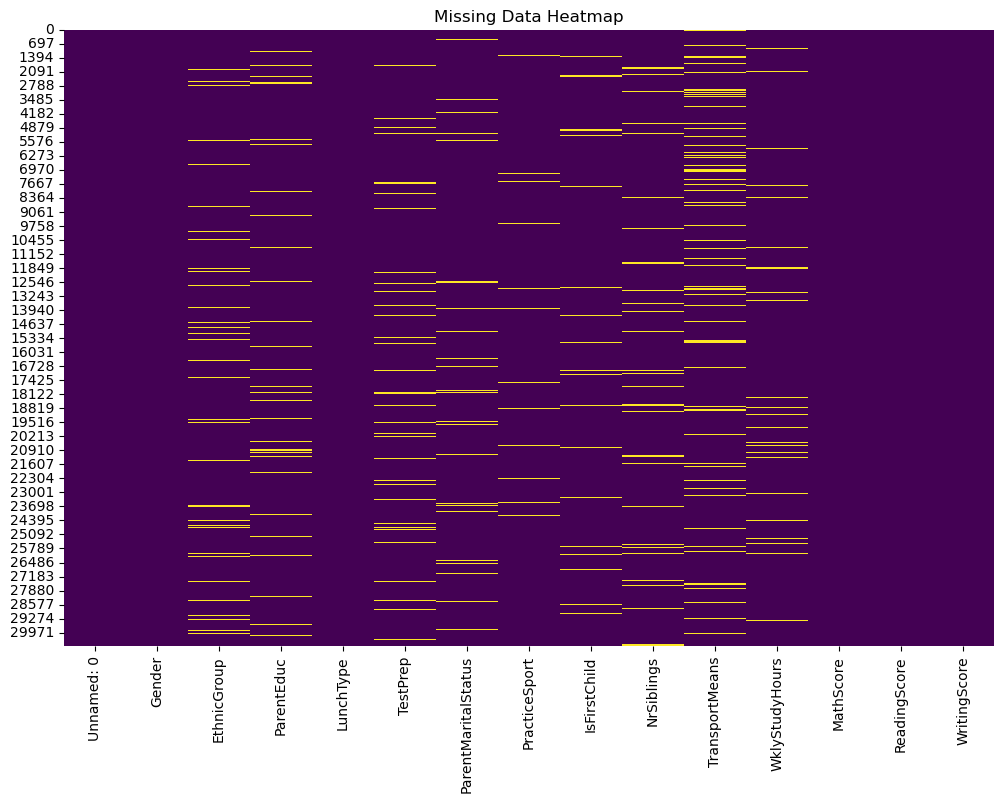

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

## Let's fill and drop values

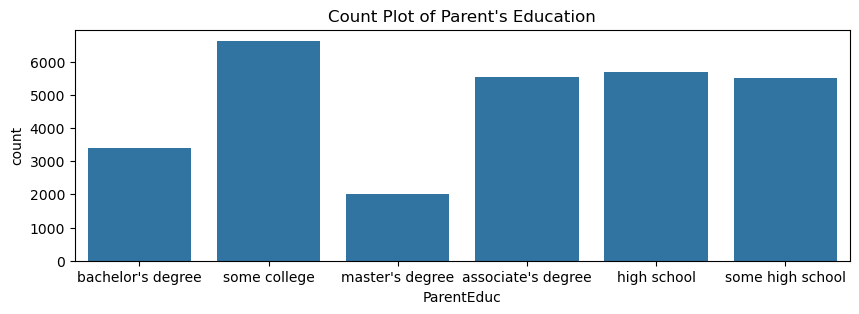

In [15]:
plt.figure(figsize=(10,3))
sns.countplot(x=df['ParentEduc'])
plt.title("Count Plot of Parent's Education")
plt.show()

In [16]:
df['ParentEduc'].value_counts()

ParentEduc
some college          6633
high school           5687
associate's degree    5550
some high school      5517
bachelor's degree     3386
master's degree       2023
Name: count, dtype: int64

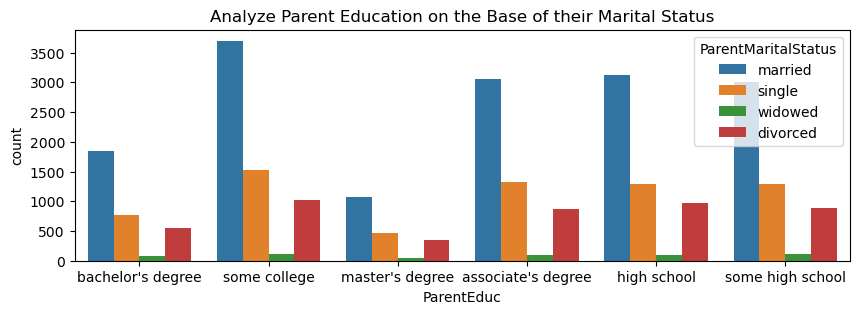

In [17]:
## Let's check degree on the basis of Parent Marital Status
plt.figure(figsize=(10,3))
sns.countplot(x=df['ParentEduc'], hue=df['ParentMaritalStatus'])
plt.title("Analyze Parent Education on the Base of their Marital Status")
plt.show()

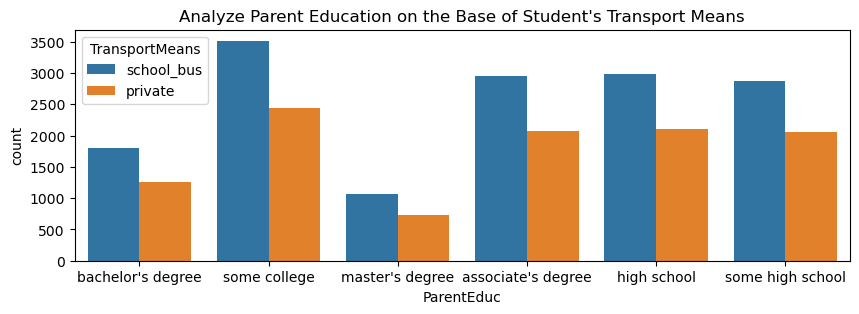

In [18]:
## Analyze education on the base of transport means
plt.figure(figsize=(10,3))
sns.countplot(x=df['ParentEduc'], hue=df['TransportMeans'])
plt.title("Analyze Parent Education on the Base of Student's Transport Means")
plt.show()

###  As,.I don't found any specific trend in Parent Educ with other, so the better option is dropna values from it

In [19]:
df.dropna(subset=['ParentEduc'], inplace=True)

In [20]:
df.isna().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1726
ParentEduc                0
LunchType                 0
TestPrep               1722
ParentMaritalStatus    1116
PracticeSport           581
IsFirstChild            844
NrSiblings             1477
TransportMeans         2933
WklyStudyHours          893
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

### Let's first drop UnNamed Column from our dataset b/c it makes no sense

In [21]:
df.head(1)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74


In [22]:
df.drop('Unnamed: 0', axis=1, inplace=True)
 # Axis = 1 specifies that i want to drop column, not row

In [23]:
df.head(1)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74


## Analyze no. of siblings

In [24]:
df['NrSiblings'].unique()

array([ 3.,  0.,  4.,  1., nan,  2.,  5.,  7.,  6.])

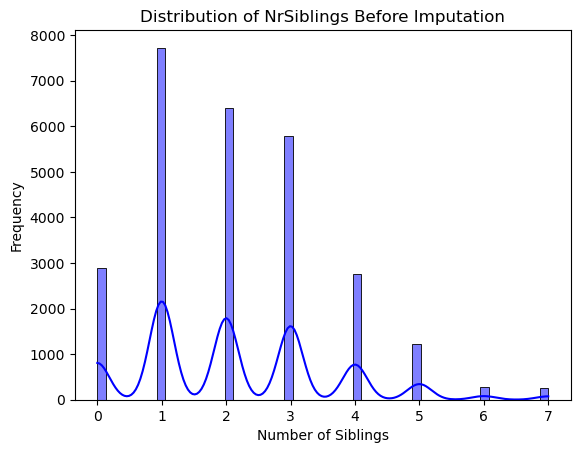

In [25]:
sns.histplot(df['NrSiblings'], kde=True, color='blue')
plt.title('Distribution of NrSiblings Before Imputation')
plt.xlabel('Number of Siblings')
plt.ylabel('Frequency')
plt.show()

In [26]:
## Fill Missing value with mean
df_filled = df.copy()  # Create a copy to compare before and after
df_filled['NrSiblings'].fillna(df['NrSiblings'].mode())

0        3.0
1        0.0
2        4.0
3        1.0
4        0.0
        ... 
30636    2.0
30637    1.0
30638    1.0
30639    3.0
30640    1.0
Name: NrSiblings, Length: 28796, dtype: float64

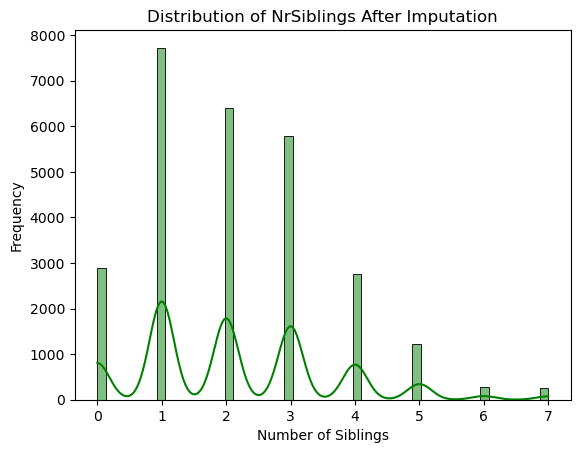

In [27]:
sns.histplot(df_filled['NrSiblings'], kde=True, color='green')
plt.title('Distribution of NrSiblings After Imputation')
plt.xlabel('Number of Siblings')
plt.ylabel('Frequency')
plt.show()

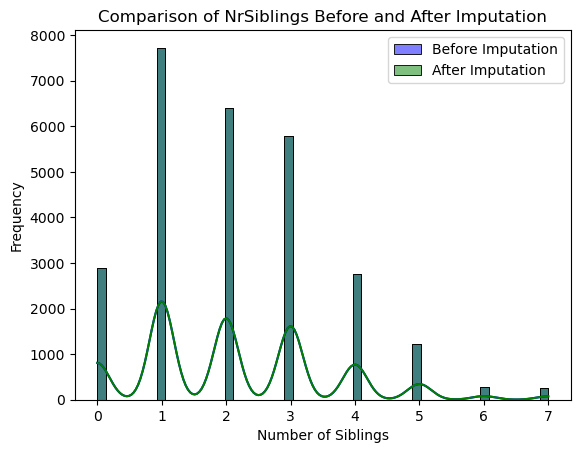

In [28]:
sns.histplot(df['NrSiblings'], kde=True, color='blue', label='Before Imputation')
sns.histplot(df_filled['NrSiblings'], kde=True, color='green', label='After Imputation', alpha=0.5)
plt.title('Comparison of NrSiblings Before and After Imputation')
plt.xlabel('Number of Siblings')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## As we see that it does not affect our data, if we fill no of sibbling with mode, so we fill it in our original dataset

In [29]:
df.isna().sum()

Gender                    0
EthnicGroup            1726
ParentEduc                0
LunchType                 0
TestPrep               1722
ParentMaritalStatus    1116
PracticeSport           581
IsFirstChild            844
NrSiblings             1477
TransportMeans         2933
WklyStudyHours          893
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [30]:
# Compute the mode of 'NrSiblings' (mode returns a Series, take the first value)
mode_value = df['NrSiblings'].mode()[0]

# Fill missing values with the mode
df['NrSiblings'] = df['NrSiblings'].fillna(mode_value)

In [31]:
df.isna().sum()

Gender                    0
EthnicGroup            1726
ParentEduc                0
LunchType                 0
TestPrep               1722
ParentMaritalStatus    1116
PracticeSport           581
IsFirstChild            844
NrSiblings                0
TransportMeans         2933
WklyStudyHours          893
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [32]:
df['NrSiblings'].unique()

array([3., 0., 4., 1., 2., 5., 7., 6.])

# Compute the correlation matrix

In [33]:
corr = df[['MathScore', 'ReadingScore', 'WritingScore']].corr()

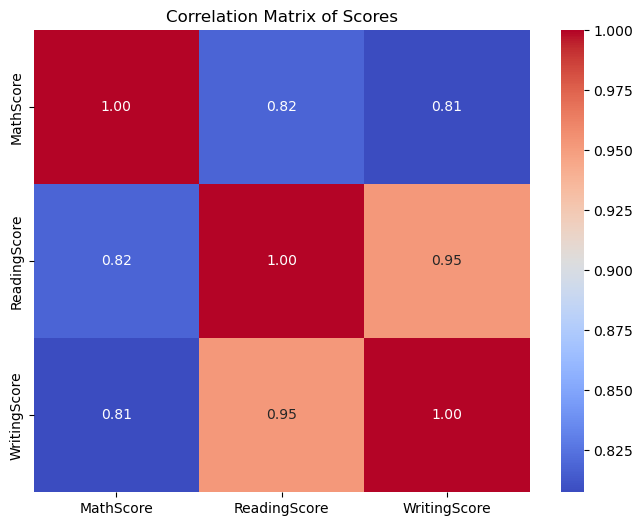

In [34]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Scores')
plt.show()

# Distribution of Score

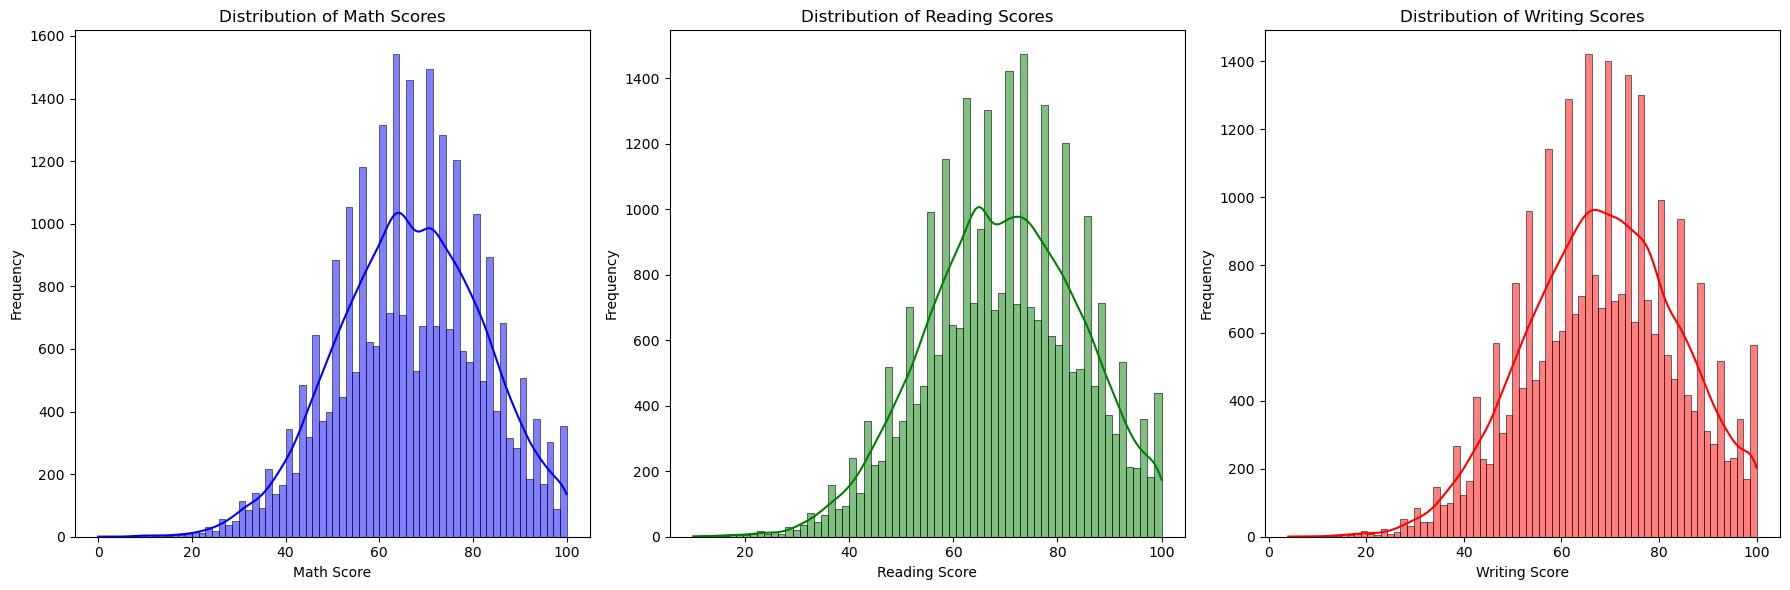

In [35]:
plt.figure(figsize=(18, 6))

# Histogram for MathScore
plt.subplot(1, 3, 1)
sns.histplot(df['MathScore'], kde=True, color='blue')
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

# Histogram for ReadingScore
plt.subplot(1, 3, 2)
sns.histplot(df['ReadingScore'], kde=True, color='green')
plt.title('Distribution of Reading Scores')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')

# Histogram for WritingScore
plt.subplot(1, 3, 3)
sns.histplot(df['WritingScore'], kde=True, color='red')
plt.title('Distribution of Writing Scores')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Box plot for lunch type

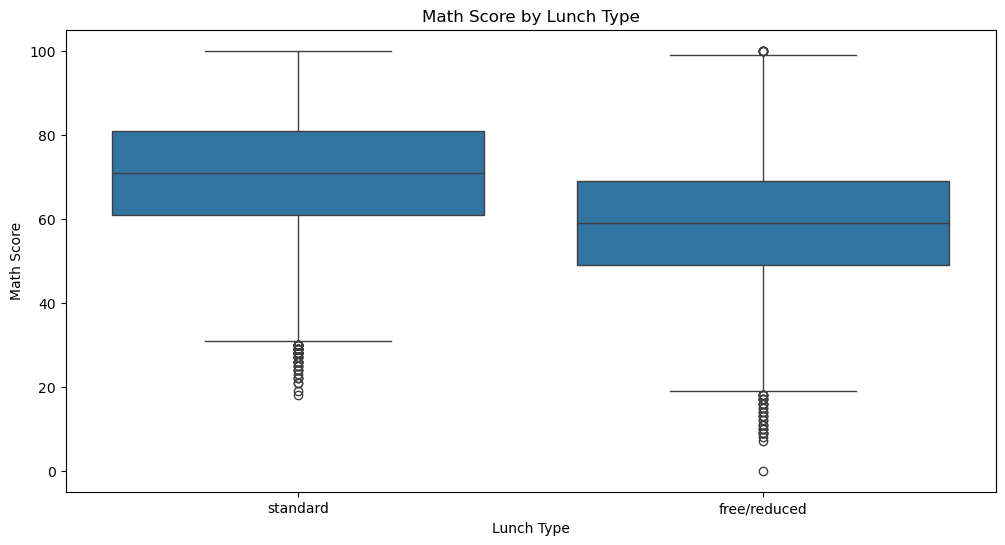

In [36]:
# Box plot for MathScore by LunchType
plt.figure(figsize=(12, 6))
sns.boxplot(x='LunchType', y='MathScore', data=df)
plt.title('Math Score by Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('Math Score')
plt.show()

## Analyze Ethnic Group

In [37]:
df['EthnicGroup'].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

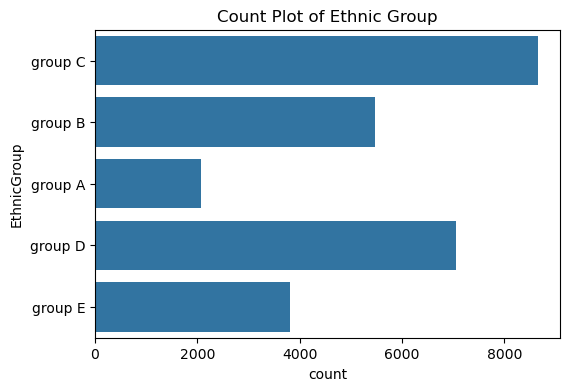

In [38]:
plt.figure(figsize=(6,4))
plt.title("Count Plot of Ethnic Group")
sns.countplot(df['EthnicGroup'])
plt.show()

## Analyze Ethnic Group on the base of gender

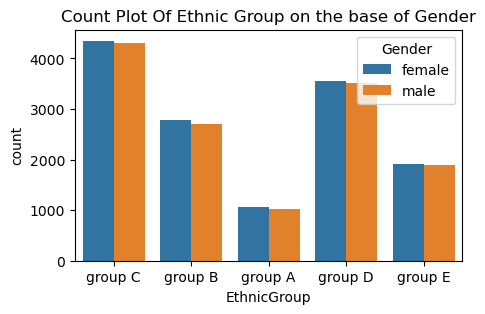

In [39]:
plt.figure(figsize=(5,3))
sns.countplot(x=df['EthnicGroup'], hue=df['Gender'])
plt.title("Count Plot Of Ethnic Group on the base of Gender")
plt.show()

## Let's Analyze it with practice sport

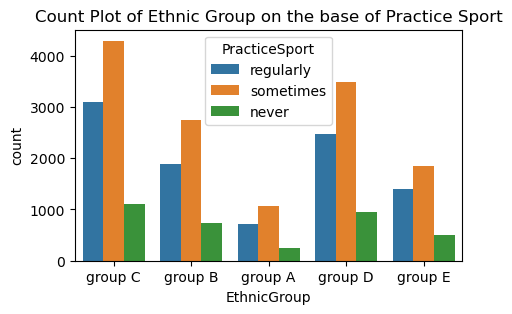

In [40]:
plt.figure(figsize=(5,3))
sns.countplot(x=df['EthnicGroup'], hue=df['PracticeSport'])
plt.title("Count Plot of Ethnic Group on the base of Practice Sport")
plt.show()

## It follow no trend, lets dropna

In [41]:
df.dropna(subset=['EthnicGroup'], inplace=True)

In [42]:
df.isna().sum()

Gender                    0
EthnicGroup               0
ParentEduc                0
LunchType                 0
TestPrep               1611
ParentMaritalStatus    1038
PracticeSport           535
IsFirstChild            796
NrSiblings                0
TransportMeans         2763
WklyStudyHours          829
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

## Lets drop all null values

In [43]:
df.dropna(inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20266 entries, 2 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               20266 non-null  object 
 1   EthnicGroup          20266 non-null  object 
 2   ParentEduc           20266 non-null  object 
 3   LunchType            20266 non-null  object 
 4   TestPrep             20266 non-null  object 
 5   ParentMaritalStatus  20266 non-null  object 
 6   PracticeSport        20266 non-null  object 
 7   IsFirstChild         20266 non-null  object 
 8   NrSiblings           20266 non-null  float64
 9   TransportMeans       20266 non-null  object 
 10  WklyStudyHours       20266 non-null  object 
 11  MathScore            20266 non-null  int64  
 12  ReadingScore         20266 non-null  int64  
 13  WritingScore         20266 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 2.3+ MB


### Analyze Gender distribution

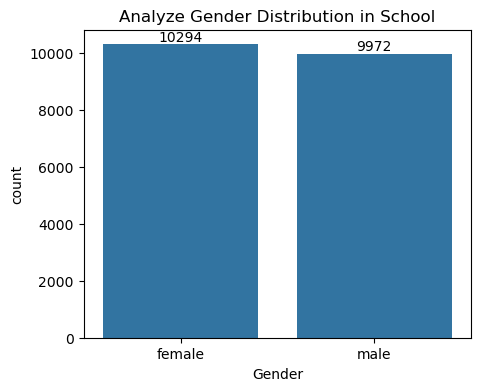

In [45]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x=df['Gender'])
ax.bar_label(ax.containers[0])
plt.title("Analyze Gender Distribution in School")
plt.show()

In [46]:
df['Gender'].value_counts()

Gender
female    10294
male       9972
Name: count, dtype: int64

###### Analysis
**`From the above chart, we analyze that no of female in a school is greater than no. on male students`**

### Parent Education Impact on scores of Student

In [47]:
## We find the aggregate/estimate of parent education on student score
gb = df.groupby('ParentEduc').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.483472,71.302296,70.496089
bachelor's degree,70.600165,73.383726,73.703428
high school,64.364892,67.354847,65.541688
master's degree,72.223796,75.825779,76.331445
some college,66.530300,69.230537,68.586802
some high school,62.558556,65.503246,63.645547


## We use heatmap for this type of data analysis

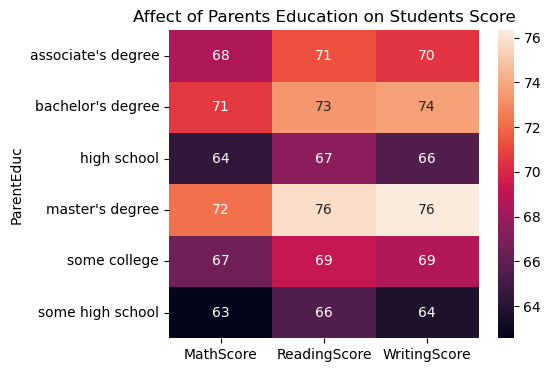

In [48]:
plt.figure(figsize=(5,4))
sns.heatmap(gb, annot=True)
plt.title("Affect of Parents Education on Students Score")
plt.show()

### Parents education impacts alot on their children scores

### Parent Marital Status Impact on scores of Student

In [49]:
## We find the aggregate/estimate of parent education on student score
gb = df.groupby('ParentMaritalStatus').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gb

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.619941,69.742522,68.872434
married,66.675799,69.447144,68.455070
single,66.357481,69.428689,68.569665
widowed,67.966667,70.594872,69.543590


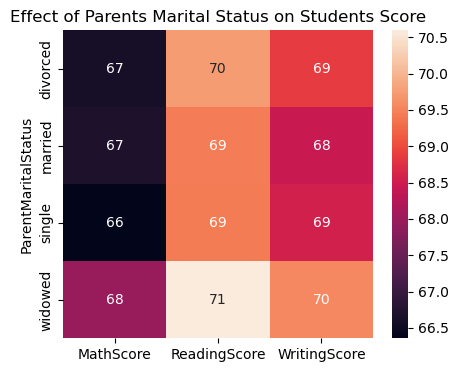

In [50]:
plt.figure(figsize=(5,4))
sns.heatmap(gb, annot=True)
plt.title("Effect of Parents Marital Status on Students Score")
plt.show()

From the above chart we have concluded that there is no/negliable impact on students score due to their parents merital status

## Lets detect outlier in scores

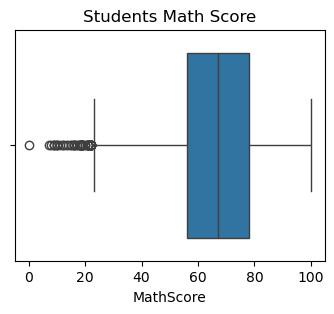

In [51]:
plt.figure(figsize=(4,3))
sns.boxplot(x=df['MathScore'])
plt.title("Students Math Score")
plt.show()

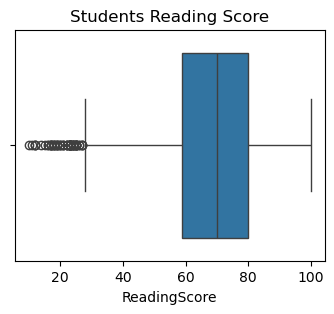

In [52]:
plt.figure(figsize=(4,3))
sns.boxplot(x=df['ReadingScore'])
plt.title("Students Reading Score")
plt.show()

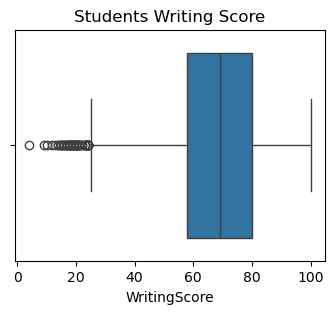

In [53]:
plt.figure(figsize=(4,3))
sns.boxplot(x=df['WritingScore'])
plt.title("Students Writing Score")
plt.show()

### Ethnics  Group Distribution

In [54]:
values_count = df['EthnicGroup'].value_counts()

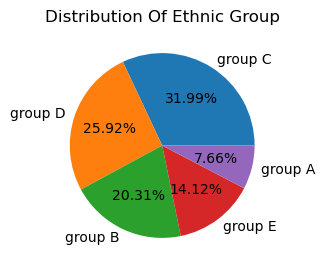

In [55]:
plt.figure(figsize=(5,3))
plt.title("Distribution Of Ethnic Group")
plt.pie(values_count, labels=values_count.keys(),autopct='%.2f%%')
plt.show()

In [56]:
values_count

EthnicGroup
group C    6484
group D    5252
group B    4116
group E    2862
group A    1552
Name: count, dtype: int64

In [57]:
values_count.keys()

Index(['group C', 'group D', 'group B', 'group E', 'group A'], dtype='object', name='EthnicGroup')

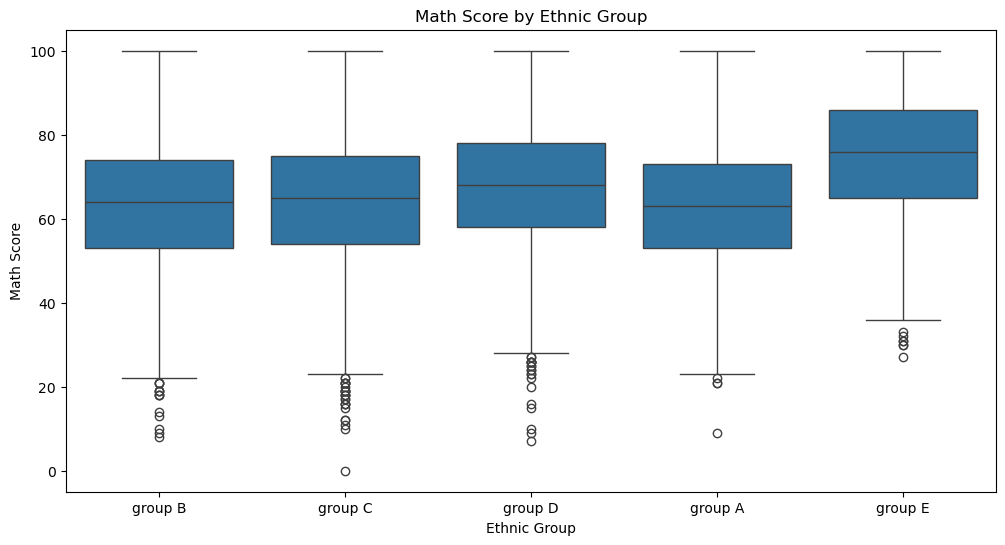

In [58]:
# Box plot for MathScore by EthnicGroup
plt.figure(figsize=(12, 6))
sns.boxplot(x='EthnicGroup', y='MathScore', data=df)
plt.title('Math Score by Ethnic Group')
plt.xlabel('Ethnic Group')
plt.ylabel('Math Score')
plt.show()

# Effect of Gender on Score

## Math Score

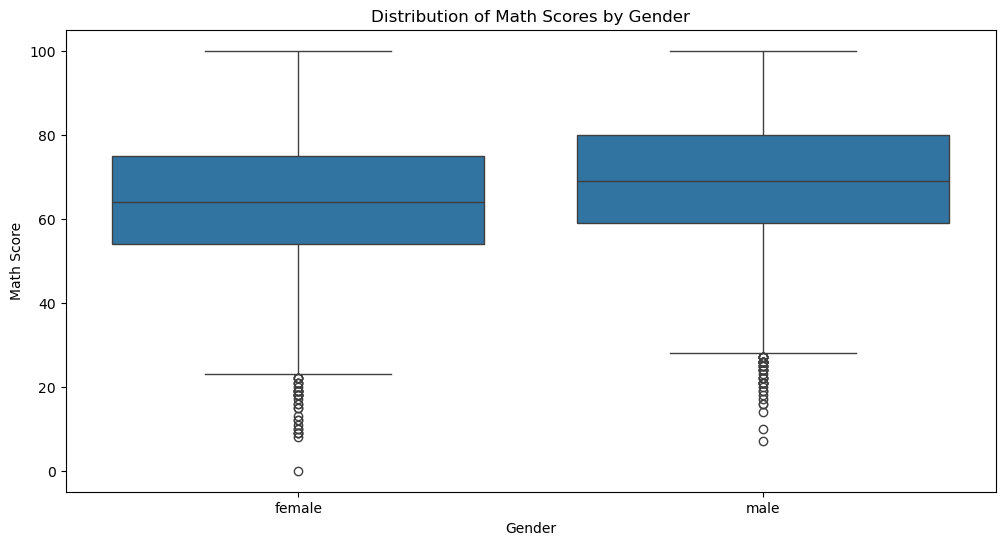

In [59]:
plt.figure(figsize=(12, 6))

# Box plot for MathScore by Gender
sns.boxplot(x='Gender', y='MathScore', data=df)
plt.title('Distribution of Math Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.show()

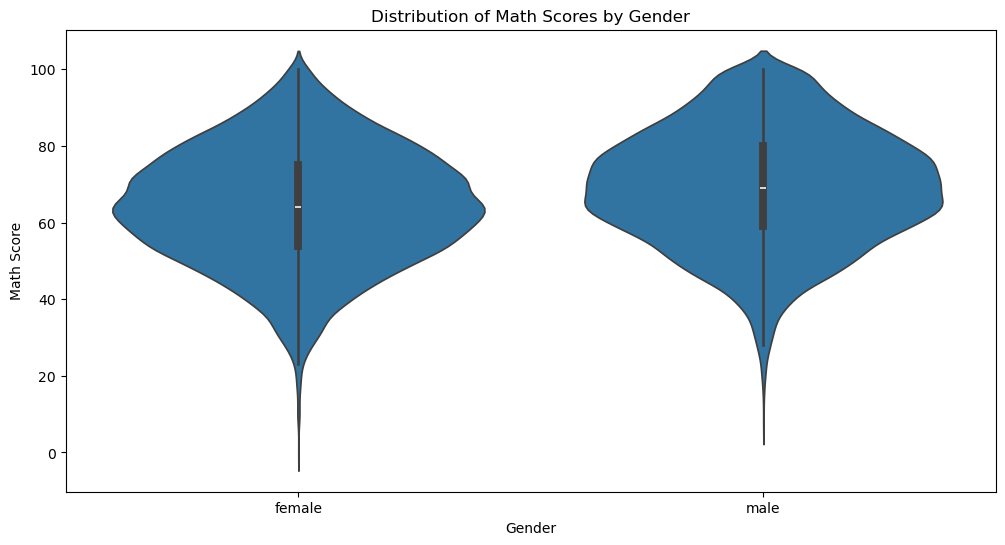

In [60]:
plt.figure(figsize=(12, 6))

# Violin plot for MathScore by Gender
sns.violinplot(x='Gender', y='MathScore', data=df)
plt.title('Distribution of Math Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.show()

In [61]:
# Summary statistics for MathScore by Gender
summary = df.groupby('Gender')['MathScore'].agg(['mean', 'median', 'std', 'count'])
print(summary)

             mean  median        std  count
Gender                                     
female  64.234991    64.0  15.142134  10294
male    69.071701    69.0  15.230742   9972


## Reading Score

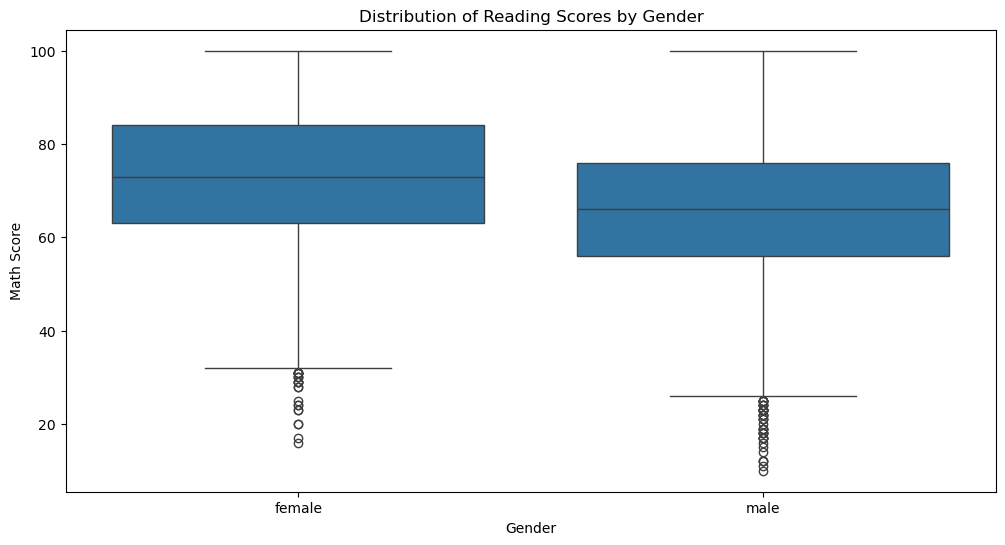

In [62]:
plt.figure(figsize=(12, 6))

# Box plot for Reading by Gender
sns.boxplot(x='Gender', y='ReadingScore', data=df)
plt.title('Distribution of Reading Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.show()

In [63]:
# Summary statistics for Reading by Gender
summary = df.groupby('Gender')['ReadingScore'].agg(['mean', 'median', 'std', 'count'])
print(summary)

             mean  median        std  count
Gender                                     
female  73.052943    73.0  14.153673  10294
male    65.861813    66.0  14.550282   9972


## Writing Score

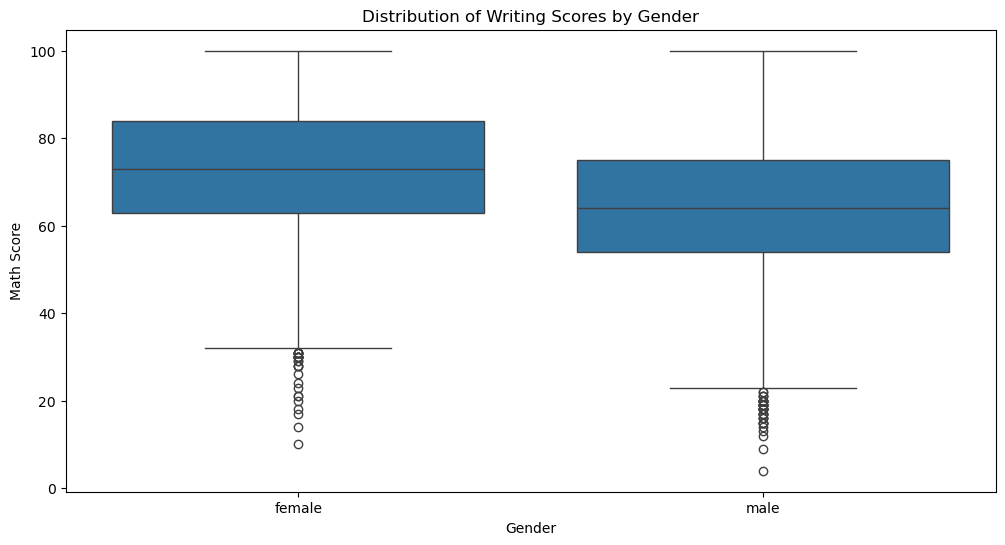

In [64]:
plt.figure(figsize=(12, 6))

# Box plot for Writing by Gender
sns.boxplot(x='Gender', y='WritingScore', data=df)
plt.title('Distribution of Writing Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.show()

In [65]:
# Summary statistics for Writing by Gender
summary = df.groupby('Gender')['WritingScore'].agg(['mean', 'median', 'std', 'count'])
print(summary)

             mean  median        std  count
Gender                                     
female  73.046338    73.0  14.572488  10294
male    63.956679    64.0  15.041557   9972


# Effect of Weekly Study Hours on Student Score

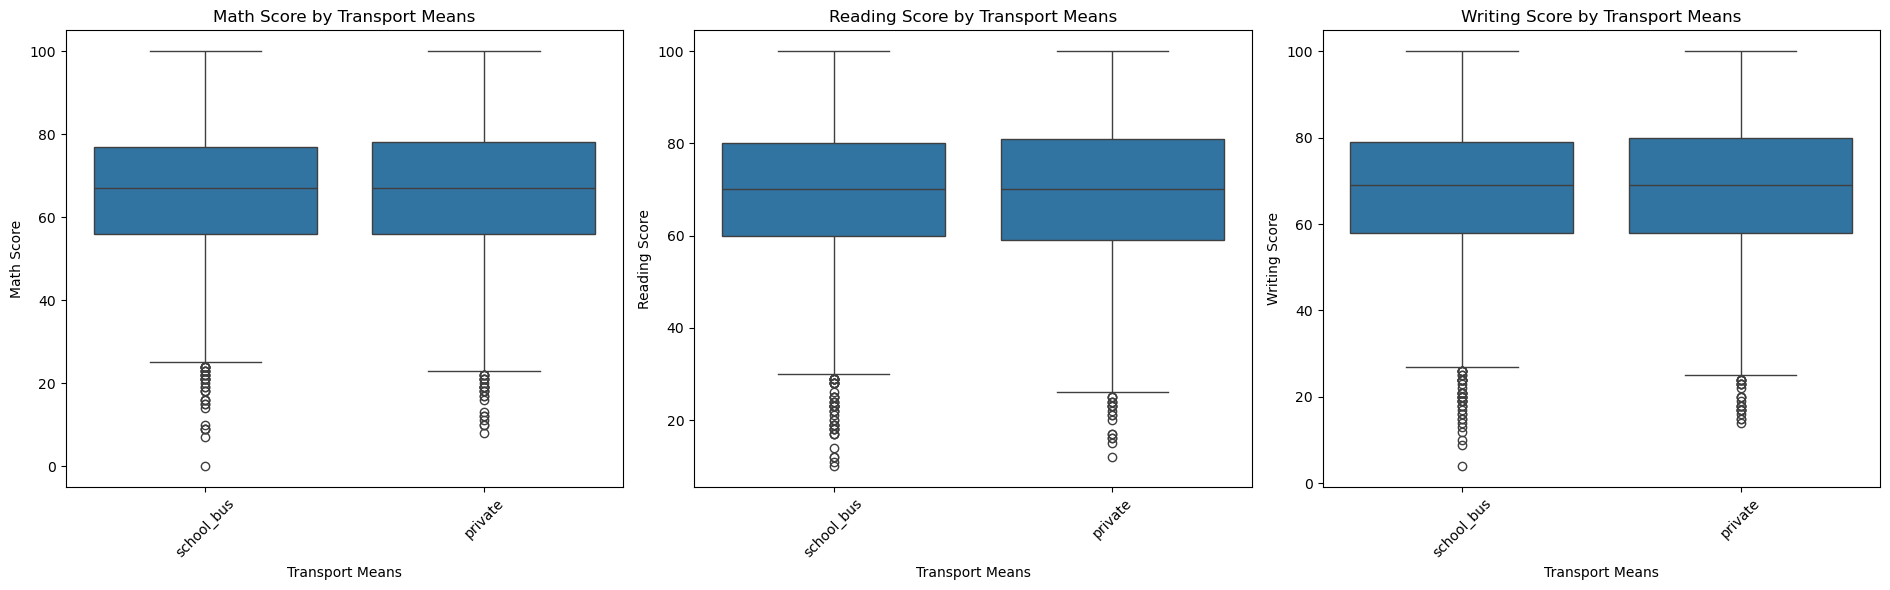

In [66]:
# Set the size of the plots
plt.figure(figsize=(19, 6))

# Plot MathScore by TransportMeans
plt.subplot(1, 3, 1)
sns.boxplot(x='TransportMeans', y='MathScore', data=df)
plt.title('Math Score by Transport Means')
plt.xlabel('Transport Means')
plt.ylabel('Math Score')
plt.xticks(rotation=45)

# Plot ReadingScore by TransportMeans
plt.subplot(1, 3, 2)
sns.boxplot(x='TransportMeans', y='ReadingScore', data=df)
plt.title('Reading Score by Transport Means')
plt.xlabel('Transport Means')
plt.ylabel('Reading Score')
plt.xticks(rotation=45)

# Plot WritingScore by TransportMeans
plt.subplot(1, 3, 3)
sns.boxplot(x='TransportMeans', y='WritingScore', data=df)
plt.title('Writing Score by Transport Means')
plt.xlabel('Transport Means')
plt.ylabel('Writing Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

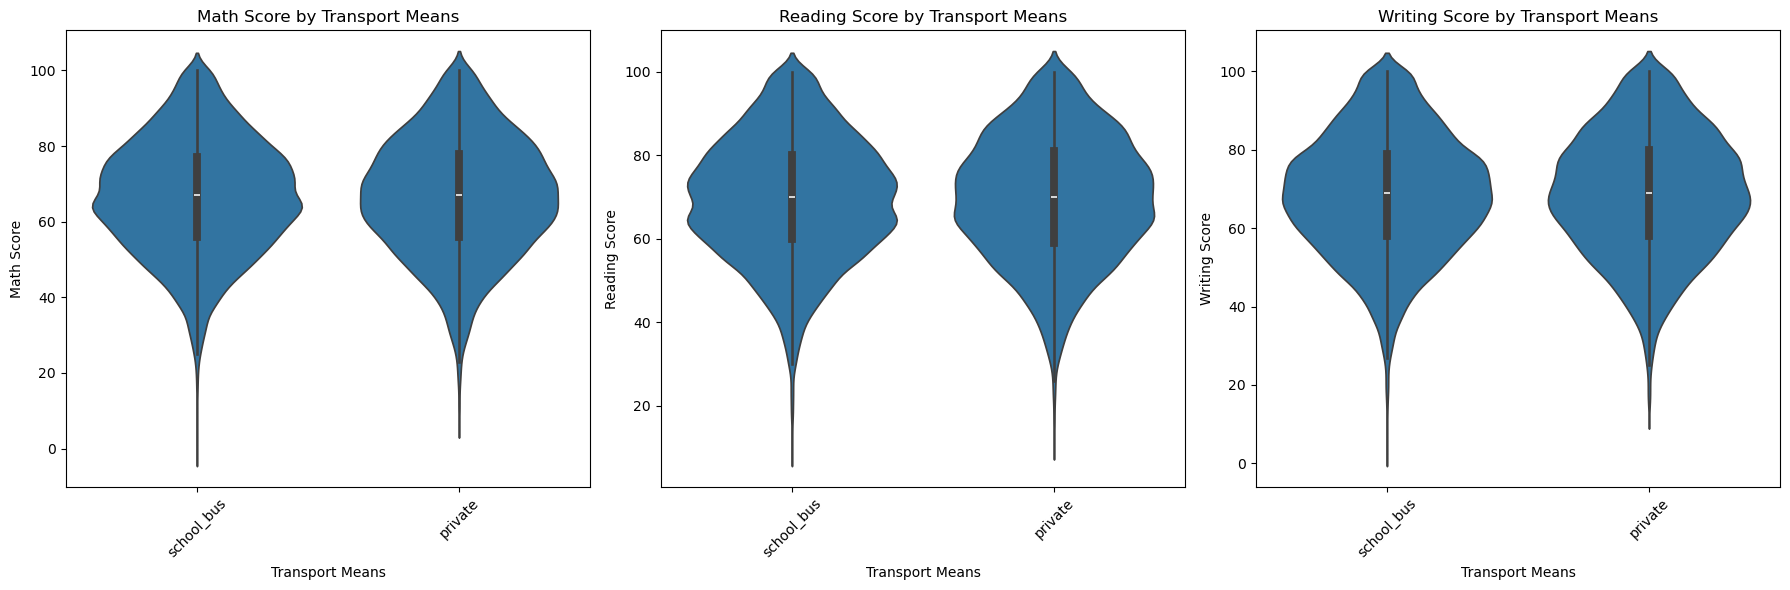

In [67]:
plt.figure(figsize=(18, 6))

# Plot MathScore by TransportMeans
plt.subplot(1, 3, 1)
sns.violinplot(x='TransportMeans', y='MathScore', data=df)
plt.title('Math Score by Transport Means')
plt.xlabel('Transport Means')
plt.ylabel('Math Score')
plt.xticks(rotation=45)

# Plot ReadingScore by TransportMeans
plt.subplot(1, 3, 2)
sns.violinplot(x='TransportMeans', y='ReadingScore', data=df)
plt.title('Reading Score by Transport Means')
plt.xlabel('Transport Means')
plt.ylabel('Reading Score')
plt.xticks(rotation=45)

# Plot WritingScore by TransportMeans
plt.subplot(1, 3, 3)
sns.violinplot(x='TransportMeans', y='WritingScore', data=df)
plt.title('Writing Score by Transport Means')
plt.xlabel('Transport Means')
plt.ylabel('Writing Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [68]:
# Summary statistics for MathScore by TransportMeans
summary_math = df.groupby('TransportMeans')['MathScore'].agg(['mean', 'median', 'std', 'count'])
print("Math Score Summary by Transport Means:\n", summary_math)

# Summary statistics for ReadingScore by TransportMeans
summary_reading = df.groupby('TransportMeans')['ReadingScore'].agg(['mean', 'median', 'std', 'count'])
print("Reading Score Summary by Transport Means:\n", summary_reading)

# Summary statistics for WritingScore by TransportMeans
summary_writing = df.groupby('TransportMeans')['WritingScore'].agg(['mean', 'median', 'std', 'count'])
print("Writing Score Summary by Transport Means:\n", summary_writing)

Math Score Summary by Transport Means:
                      mean  median        std  count
TransportMeans                                     
private         66.570783    67.0  15.608412   8406
school_bus      66.646206    67.0  15.210997  11860
Reading Score Summary by Transport Means:
                      mean  median        std  count
TransportMeans                                     
private         69.564478    70.0  14.951528   8406
school_bus      69.479089    70.0  14.680749  11860
Writing Score Summary by Transport Means:
                      mean  median        std  count
TransportMeans                                     
private         68.629550    69.0  15.671928   8406
school_bus      68.534148    69.0  15.354334  11860


## Effect of Test Preperation

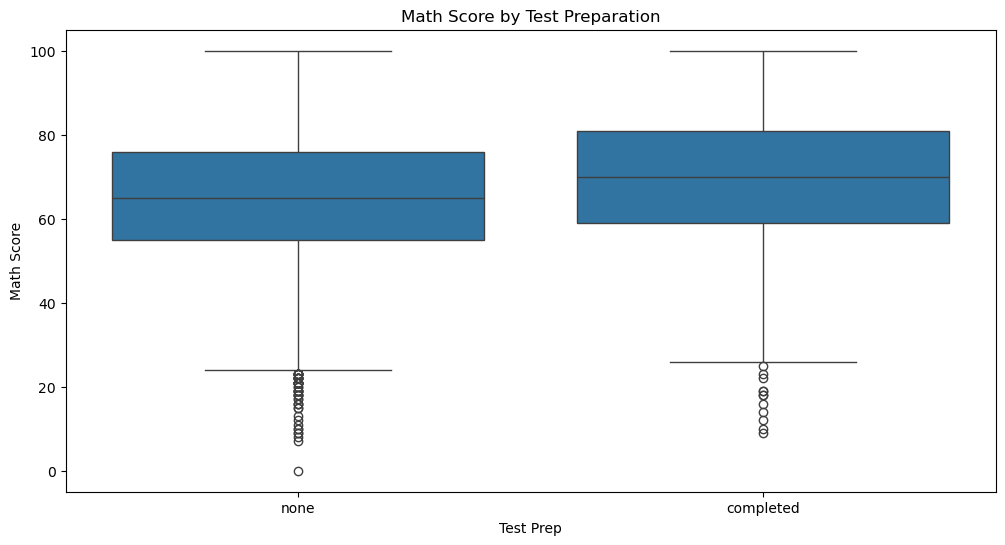

In [69]:
# Box plot for MathScore by TestPrep
plt.figure(figsize=(12, 6))
sns.boxplot(x='TestPrep', y='MathScore', data=df)
plt.title('Math Score by Test Preparation')
plt.xlabel('Test Prep')
plt.ylabel('Math Score')
plt.show()